# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.117727e+01     8.754315e+00
 * time: 0.0026750564575195312
     1     2.887430e+01     5.784560e+00
 * time: 0.011939048767089844
     2     2.163021e+01     8.176678e+00
 * time: 0.02306509017944336
     3     1.827151e+01     8.552778e+00
 * time: 0.03405404090881348
     4     1.299826e+01     4.441146e+00
 * time: 0.04490208625793457
     5     9.876556e+00     1.750782e+00
 * time: 0.055808067321777344
     6     9.098958e+00     1.148724e+00
 * time: 0.0645599365234375
     7     8.801123e+00     6.581260e-01
 * time: 0.07329106330871582
     8     8.600493e+00     7.909342e-01
 * time: 0.0821070671081543
     9     8.472953e+00     6.046697e-01
 * time: 0.0910329818725586
    10     8.395639e+00     6.106495e-01
 * time: 0.10001587867736816
    11     8.359927e+00     1.325535e+00
 * time: 0.10671591758728027
    12     8.319987e+00     7.433462e-01
 * time: 0.1133720874786377
    13     8.261005e+00     4.690529e-01
 * time:

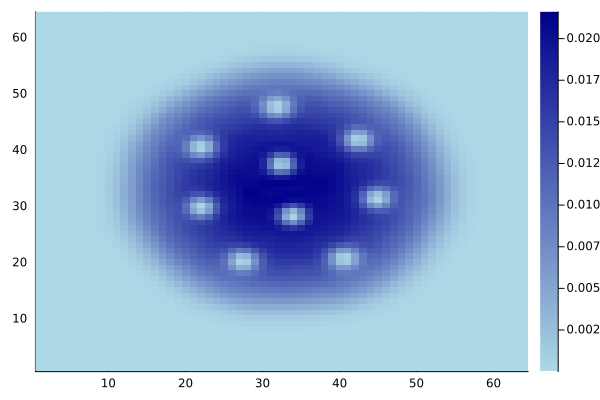

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)